In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
import pandas as pd
from scipy.integrate import trapezoid, simpson, quad, tplquad, dblquad
from scipy.interpolate import CubicSpline
from scipy.special import roots_legendre

In [2]:
def Derivada_Tres_Puntos(f, x, h):
    """
    Calcula la derivada de tres puntos para una función f en un conjunto de puntos x con paso h.

    Parámetros:
    - f: función a derivar.
    - x: array de puntos donde evaluar la derivada.
    - h: paso entre puntos en el array x.

    Retorna:
    - Array de las derivadas aproximadas en cada punto de x.
    """
    n = len(x)  # Número de puntos
    fprime = np.zeros_like(x)  # Array para almacenar las derivadas

    for i in range(n):
        if i == 0:
            # Derivada adelantada para el primer punto
            fprime[i] = (-3 * f(x[i]) + 4 * f(x[i] + h) - f(x[i] + 2 * h)) / (2 * h)
        elif i == n - 1:
            # Derivada atrasada para el último punto
            fprime[i] = (3 * f(x[i]) - 4 * f(x[i] - h) + f(x[i] - 2 * h)) / (2 * h)
        else:
            # Derivada centrada para los puntos intermedios
            fprime[i] = (f(x[i] + h) - f(x[i] - h)) / (2 * h)

    return fprime


In [3]:
def diferencias_finitas( f,x, h):
    '''
    Esta función calcula la derivada de una función usando 
    el metodo de diferencias finitas.

    Entradas
    x: puntos 
    f: función a derivar
    h: espaciado
    n = len(x)

    Salida:
    Derivada: array
    '''    
    
    n = len(x)

    f_prime = np.zeros_like(x)

    for i in range(n):
        if i == 0 :
            f_prime[i] = (f(x[i] + h ) - f(x[i])) / h
        elif i == n-1:
            f_prime[i] = (f(x[i]) - f(x[i] - h)) / h
        else:
            f_prime[i] = (f(x[i] + h) - f(x[i] - h))/ (2 * h)
    return f_prime
                                            


# Laboratorio 05: Cálculo Numérico.

---
### Profesor: Daniel Ruiz Mejía
### Nombre: Jesús Armando Cañas Gamboa
*Métodos computacionales 2025-I*

---

# 1.

En un cirtcuito con un voltaje de  $\varepsilon(t)$ y una inductancia de $L$, la primera ley de Kirchhoff nos da la siguiente relación

$$
\varepsilon(t) = L\frac{\mathrm{d}i}{\mathrm{d}t} + Ri
$$

donde $R$, es la resistencia del ciruito, $I$ es la corriente. Suponga que medimos la corriente con varios valores de $t$ y obtenemos:

```
t = np.array([1.00, 1.01, 1.02, 1.03, 1.04])  # tiempo
i = np.array([3.10, 3.12, 3.14, 3.18, 3.24])  # corriente
```


donde $t$ se mide en segundos, $I$ se da en Amperios, la inductancia $L= 0.98$ H y la resistencia es de 0.142 $\Omega$. Aproxime el votaje  $\varepsilon(t)$ en los valores t=1.00, 1.01, 1.02, 1.03, 1.04 ,  para ello realice lo siguiente:


- Construya un data frame de pandas con los valores de tiempo y corriente
- Emplee el metodo de diferencias finitas y de tres puntos para calcular la derivada numérica.
- Ahora, encuentre un polinomio de interpolación usando alguno de los métodos vistos y calcule la derivada 'exacta'. Compare sus resultados.

In [6]:
t = np.array([1.00, 1.01, 1.02, 1.03, 1.04])  # tiempo
i = np.array([3.10, 3.12, 3.14, 3.18, 3.24])  # corriente

#Dataframe con los valores de tiempo y corrinte
df = pd.DataFrame({'tiempo':t, 'corriente': i})

#interpolación de i
pol_i = CubicSpline(t, i)

#Calculo de di
di = np.gradient(i, t)

#interpolacion de di
pol_di = CubicSpline(t, di)

#Calculamos la derivada usando tres puntos y diferencias finitas
df['Tres_puntos'] = Derivada_Tres_Puntos( pol_i, t, 0.0001)
df['Diferencias_Finitas'] = diferencias_finitas(pol_i, t, 0.0001)



#Definimos la funcion
E = lambda t : 0.98 * pol_di(t) + 0.142* pol_i(t)


#Calculamos E(t)
df['E(t)'] = E(t)

#Derivada con interpolación
df['Con interpolacion'] = pol_di(t)

In [7]:
df

,tiempo,corriente,Tres_puntos,Diferencias_Finitas,E(t),Con interpolacion
0,1.00,3.10,2.833250,2.820875,2.40020,2.0
1,1.01,3.12,1.583375,1.583375,2.40304,2.0
2,1.02,3.14,2.833350,2.833350,3.38588,3.0
3,1.03,3.18,5.083325,5.083325,5.35156,5.0
4,1.04,3.24,6.833350,6.825825,6.34008,6.0


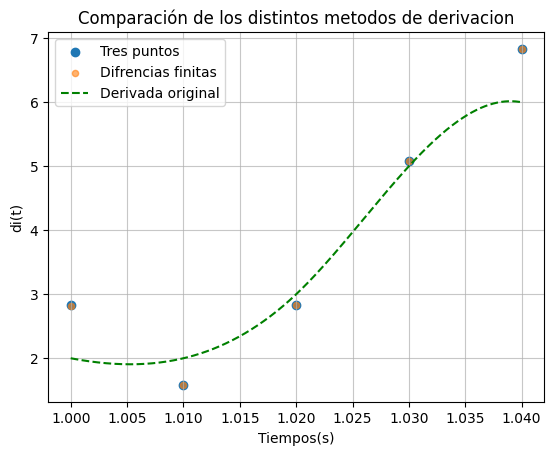

In [10]:
#Grafico de comparación
plt.title('Comparación de los distintos metodos de derivacion')
plt.scatter(t, df['Tres_puntos'], label = 'Tres puntos',)
plt.scatter(t, df['Diferencias_Finitas'], label = 'Difrencias finitas', s = 20, alpha = 0.6)
t_inter = np.linspace(min(t), max(t),1000)
plt.plot(t_inter, pol_di(t_inter), label = 'Derivada original', color = 'green', linestyle = '--')
plt.xlabel('Tiempos(s)')
plt.ylabel('di(t)')
plt.legend()
plt.grid(alpha = 0.7)
plt.show()

# 2.
Utilizando los siguientes datos de tiempo y distancia:

```
t = np.array([0, 3, 5, 8, 10, 13])  # Tiempo en s
x = np.array([0, 225, 383, 623, 742, 993])  # Distancia recorrida en m
```

- Determinar la velocidad instantanea para cada uno de los tiempos y distancias mostrados.

- ¿Cuál será la velocidad para $t=12$?




In [109]:
t = np.array([0, 3, 5, 8, 10, 13])  # Tiempo en s
x = np.array([0, 225, 383, 623, 742, 993])  # Distancia recorrida en m

v = np.gradient(x, t)

print('tiempo(s)  Velocidad(m/s)')
for i in range(len(t)):
    print(f'{t[i]}          {v[i]:.2f}')


pol_v = CubicSpline(t, v)

print(f'La velocidad en el tiempo t = 12s es {pol_v(12):.2f}')

tiempo(s)  Velocidad(m/s)
0          75.00
3          77.40
5          79.40
8          67.70
10          69.17
13          83.67
La velocidad en el tiempo t = 12s es 78.30


# 3.
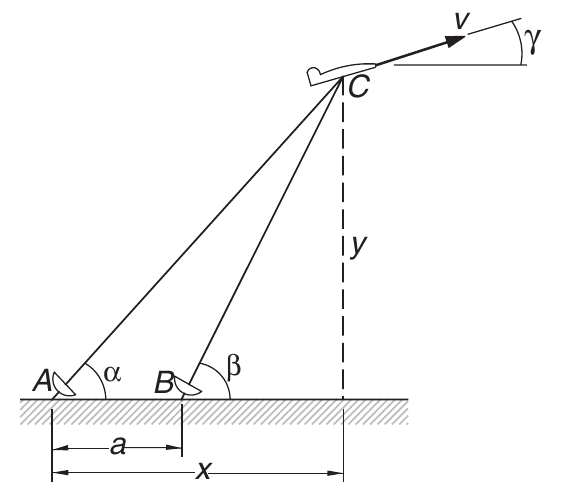


Las estaciones de radar $A$ y $B$, separadas por una distancia $a = 500 \, \text{m}$, rastrean un avión $C$ registrando los ángulos $\alpha$ y $\beta$ en intervalos de 1 segundo. Tres lecturas sucesivas son


```
data = {
    't (s)': [9, 10, 11],
    'alpha (°)': [54.80, 54.06, 53.34],
    'beta (°)': [65.59, 64.59, 63.62]
}

df = pd.DataFrame(data)
```

Calcular la velocidad $v$ del avión y el ángulo de ascenso $\gamma$ en $t = 10 \, \text{s}$. Las coordenadas del avión pueden expresarse como:

$$
x = a \frac{\tan \beta}{\tan \beta - \tan \alpha}
$$

$$
y = a \frac{\tan \alpha \tan \beta}{\tan \beta - \tan \alpha}
$$

In [11]:
#Importamos el dataframe

data = {
    't (s)': [9, 10, 11],
    'alpha (°)': [54.80, 54.06, 53.34],
    'beta (°)': [65.59, 64.59, 63.62]
}

df = pd.DataFrame(data)

#Extraemos los datos nesesarios
beta = df['beta (°)']
alpha = df['alpha (°)']
t = df['t (s)']
a = 500.0

#Calculamos x y y
x = a * np.tan(beta) / (np.tan(beta) - np.tan(alpha))
y = a * np.tan(alpha) * np.tan(beta) /(np.tan(beta) - np.tan(alpha))

#Calculamos vx y vy usando gradient
vx = np.gradient(x, t)
vy = np.gradient(y, t)

#Calculamos la magnitud de la velocidad
v = np.sqrt(vx **2 + vy ** 2)

#Calculamos y
y = np.arctan(vy/vx)

#Imprimimos el valor en t = 10
print(f'La velocidad en t = 10s es {v[1]:.2f} m/s\ny el angulo es {np.rad2deg(y[1]):.2f}°')



La velocidad en t = 10s es 243.58 m/s
y el angulo es -26.79°


# 4.
Se proporcionan los siguientes datos para la velocidad de un objeto en función del tiempo:

```
# Datos de tiempo y velocidad
t = np.array([0, 4, 8, 12, 16, 20, 24, 28, 32, 36])  # segundos
v = np.array([0, 34.7, 61.8, 82.8, 99.2, 112.0, 121.9, 129.7, 135.7, 140.4])  # m/s
```
- ¿Qué tan lejos viaja el objeto desde $t = 0$ hasta 28 s?
- ¿Cuál es la aceleración del objeto a $t = 28$ s?

In [12]:
# Datos de tiempo y velocidad
t = np.array([0, 4, 8, 12, 16, 20, 24, 28, 32, 36])  # segundos
v = np.array([0, 34.7, 61.8, 82.8, 99.2, 112.0, 121.9, 129.7, 135.7, 140.4])  # m/s

#Integramos de 0 a 28 v(t) dt para calcular el despalzamiento 
x_t = simpson(v[0:8], t[0:8], dx = 0.01)
print(f'el desplazamieto de t = 0 a t = 28 es {x_t:.2f}m')

#Derivamos en t = 28 s para calcular la aceleracion
pol_v = CubicSpline(t, v)
a = Derivada_Tres_Puntos(pol_v, t, 0.0001)

print(f'la aceleracion en t = 28 es {a[7]:.2f} m/s**2')


el desplazamieto de t = 0 a t = 28 es 2319.77m
la aceleracion en t = 28 es 1.00 m/s**2


# 5.

El área superficial horizontal $A_s$ ($m^2$) de un lago a una profundidad particular puede calcularse a partir del volumen por diferenciación:

$$A_s(z) = -\frac{dV(z)}{dz}$$

donde:
- $V$ = volumen ($m^3$)
- $z$ = profundidad ($m$) medida desde la superficie hacia el fondo


La concentración promedio de una sustancia que varía con la profundidad $c$ ($g/m^3$) puede calcularse por integración:

$$c = \frac{\int_0^Z c(z)A_s(z) dz}{V_T}$$

donde:
- $Z$ = profundidad total (m)
- $V_T$ = volumen total del lago, dado también por:


$$V_T = \int_0^Z A_s(z) dz$$
Con base en los siguientes datos, determine la concentración promedio.
```
# Datos proporcionados
z = np.array([0, 4, 8, 12, 16])  # profundidad en metros
V = np.array([9.8175, 5.1051, 1.9635, 0.3927, 0.0000]) * 1e6  # volumen en m³
c = np.array([10.2, 8.5, 7.4, 5.2, 4.1])  # concentración en g/m³

# Parámetros importantes
Z = z[-1]  # profundidad total (16 m)
```

In [137]:
# Datos proporcionados
z = np.array([0, 4, 8, 12, 16])  # profundidad en metros
V = np.array([9.8175, 5.1051, 1.9635, 0.3927, 0.0000]) * 1e6  # volumen en m³
c = np.array([10.2, 8.5, 7.4, 5.2, 4.1])  # concentración en g/m³

# Parámetros importantes
Z = z[-1]  # profundidad total (16 m)

#Interpolamos V en funcion de Z
V_z = CubicSpline(z, V)
#Derivamos para calcular la derivada
A_s1 = V_z.derivative()
A_s = lambda z : -1* A_s1(z)
#Interpolamos c en función de z
c_z = CubicSpline(z, c)

#Calculamos el volumen total
VT = simpson(A_s(z), z, dx = 0.001)

#Definimos la funcion c * A
cA = lambda z: A_s(z)* c_z(z)

#Calculamos la concentracion promedio usando quad
c_p, _ = quad(cA, 0, 16)
c_p = c_p /VT

print(c_p)

8.238088888888887


In [141]:
#Usando Simpson
print(simpson(A_s(z)*c_z(z), z, dx = 0.000001)/VT)

8.243444444444444


# 6.
La función de onda del electrón en estado 2s ($n=2$, $l=0$, $m=0$) en unidades radiales adimensionales es:

$$\psi_{200}(r,\theta,\varphi) = \frac{1}{4\sqrt{2\pi}} (2 - r) e^{-r/2}$$

La probabilidad de encontrar el electrón entre $r=0$ y $r=R$ está dada por:

$$P(R) = \frac{1}{8} \int_0^R r^2 (2 - r)^2 e^{-r} dr$$

donde las integrales angulares contribuyen un factor de $4\pi$.

- Calcule las probabilidades $P(R)$ para $R \in [10,25]$ con incrementos de 1 utilizando los métodos:
    - Trapezoidal
    - Simpson
    - Cuadratura
    
Garantizando que el error sea menor a $\varepsilon = 10^{-6}$
- Calcule la integral radial desde $r=0$ hasta $+\infty$, verifique que la probabilidad total sea 1.



In [4]:
#Integral con trapezoid con error 
def Trapezoid_e(f, x, e, N, v):
    '''
    Esta función calcula la integral de una 
    función usando trapezoid garantizando un error de 
    e-5
    Entradas
    y: puntos de la funcion
    x: puntos del dominio
    e: error
    N: numero maximo de iteraciones
    v: valor de comparacion
    Salida
    Valor de la integral con error de e-5
    '''

    a = min(x)
    b = max(x)
    
    f_a = f(a)
    f_b = f(b)

    suma_xi = 0
    n = 2
    for i in range(N):
        
        h = (b - a) / n
        suma_xi = 0
        
        for t in range(n):
            x_i = a + t * h #Ancho del trapecio
            suma_xi += f(x_i) #Calculamos la suma de los xi hasta n-1
            
        integral = h/2 *(f_a + 2* suma_xi + f_b) #Calculamos el valor de la integral
        
        n *= 2 #Damos un valor mas grande a n

        if abs(v - integral) < e: #Miramos si cumple con el error
            return integral #Si es asi retornamos la integral
        
    raise RuntimeError('Maximo de iteraciones alcanzado')

In [5]:
#Integral con trapezoid con error 
def simpson_e(f, x, e, N, v):
    '''
    Esta función calcula la integral de una 
    función usando simpson garantizando un error de 
    e-5
    Entradas
    y: puntos de la funcion
    x: puntos del dominio
    e: error
    N: numero maximo de iteraciones
    v: valor de comparacion
    Salida
    Valor de la integral con error de e-5
    '''
    a = min(x)
    b = max(x)
    f_a = f(a)
    f_b = f(b)
    
    n = 2
    
    for t in range(N):
        h = (b - a)/n #Actualización de n
        suma_no_mult3 = 0
        suma_mult_3 = 0
        
        for i in range(n):
            x_i = a + i*h #Actualización del xi
            
            if i%3 == 0:
                suma_mult_3+= 2* f(x_i) #Para los multiplos de 3
            else:
                suma_no_mult3+= 3* f(x_i) #Para los que no son multiplos de 3
            
        integral = (3*h/8) *(f_a + suma_no_mult3 + suma_mult_3 + f_b) #Calculamos el valor de la integral
        
        if abs(v - integral) < 1e-5: #Miramos si cumple con el error
            
            return integral #Si es asi retornamos la integral
        n *= 2 #Damos un valor mas pequeño a n

        
    raise RuntimeError('Maximo de iteraciones alcanzado')

In [6]:
def Cuadratura_Gaussiana_error(f, a, b, v ,e , N):
    '''
    Calcula la integral usando polinomio
    de Gauss Legendre entre[a,b]
    
    Entradas
    f funcion Callable
    a limite inferior del intervalo
    b limite superior del intervalo
    N maximo de iteraciones
    v valor mas presiso de la integral
    e error
    Salida
    Valor aproximado de la integral
    con un error e
    '''
    p = (b-a)/2 #Nuevos parametros de sustitucion
    
    q = (b +a )/2

    n = 1
    for i in range(N):
        
        xi , wi = roots_legendre(n)

        valores = np.array([ f(p * x + q) for x in xi])
        
        integral = p * np.sum(wi * valores) #Valor de la integral
        
        if abs(v - integral)<= e:
            return integral
        n *= 10
    raise RuntimeError('Maximo de iteraciones alcanzado sin convergencia')

In [7]:
#Hcemos un arrya con los valores de r
R = np.arange(10, 26, 1)

P_R = lambda r: 1/8 * r**2 * (2 - r)**2 * np.e**-r

#Integral usando quad
v, _ = quad(P_R, 10, 25)

e = 1e-5
N = 25

#Integral usando Simpon con error de 1e-5
simp = simpson_e(P_R, R, e, N, v)

#Integral usando trapezoid
Tr = Trapezoid_e(P_R, R, e, N, v)

#Integral usando Cuadratura
Cr = Cuadratura_Gaussiana_error(P_R, 10, 26, v, e, N)

In [11]:
#Hacemos un dataframe con todos los datos
df= pd.DataFrame({'Metodos': ['Quad_Gaus', 'Trapezoid', 'Simpson'],
                  'Valor': [Cr, Tr, simp],
                  'error': [e, e, e]})
        

In [12]:
df #Mostramos

,Metodos,Valor,error
0,Quad_Gaus,0.059519,0.00001
1,Trapezoid,0.059527,0.00001
2,Simpson,0.059525,0.00001


In [13]:
#Comprobamos que la probabilidad total es 1

a = 0
b = np.inf

print(quad(P_R, a, b))

(1.0000000000000004, 1.404735272382949e-09)


# 7.
Una lámina cuadrada uniforme de metal flota inmóvil en el espacio:

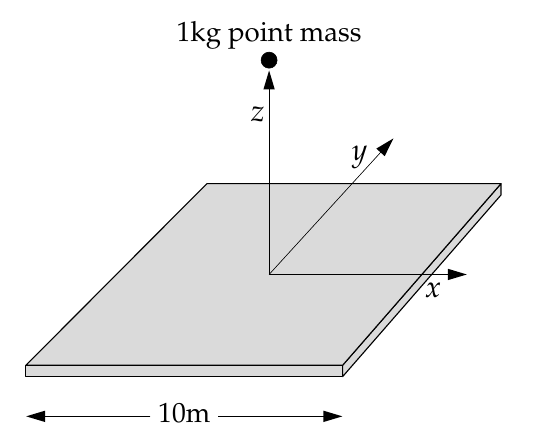

La lámina cuadrada tiene 10 m de lado y espesor despreciable. La componente de la fuerza gravitacional a lo largo del eje $z$ sobre una masa de prueba de 1 kg ubicada a distancia $z$ del centro de la lámina es:

$$F_z = G\sigma z \iint_{-L/2}^{L/2} \frac{dx \, dy}{(x^2 + y^2 + z^2)^{3/2}}$$

donde $G = 6.674 \times 10^{-11} \, \text{m}^3 \, \text{kg}^{-1} \, \text{s}^{-2}$, $\sigma = \frac{M}{L^2}$, $L = 10$ m y $M = 10,000$ kg.

- Calcular numéricamente esta integral doble.
- Graficar $F_z$ como función de $z$ desde $z=0$ hasta $z=10$ m


In [14]:
Z = np.linspace(0.1, 10, 1000 )

F = []

for z in Z:
   
    def integral_x(y, z = z):
        L = 10
        G = 6.674e-11
        M = 10000
        sigma = M / L**2
   
        integrando = lambda x, G, sigma : 1/ (x**2 + y**2 + z**2)**1.5
        integral, error = quad(integrando, -L/2, L/2, args = (G, sigma,) )
   
        return integral

    L = 10

    integral, error = quad(integral_x, -L/2, L/2 )
   
    F.append(integral)



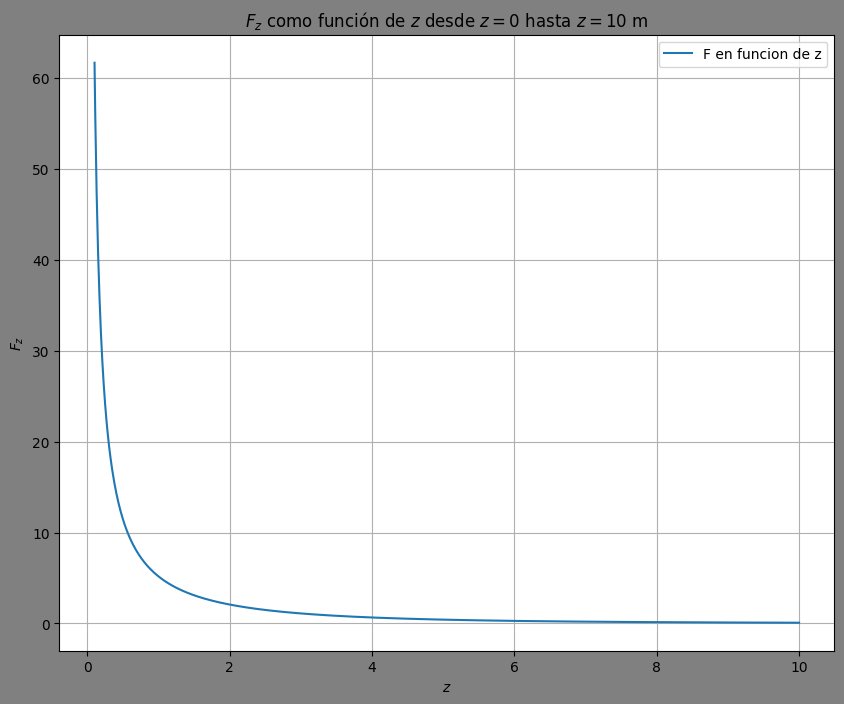

In [25]:
plt.figure(figsize=(10,8), facecolor = 'gray', edgecolor= 'black')
plt.title('$F_z$ como función de $z$ desde $z=0$ hasta $z=10$ m')
plt.plot(Z, F , label = 'F en funcion de z')
plt.grid()
plt.legend()
plt.xlabel('$z$')
plt.ylabel('$F_z$')
plt.show()